In [1]:
import seaborn as sns
from glob import glob
import pandas as pd
from adc.yeast import merge_tables
import matplotlib.pyplot as plt
import numpy as np

In [2]:
paths = glob("/home/aaristov/Multicell/Madison/2024-01-10_MLY003+Cas9/pos/Include/pos*/output/skew_table*.csv") + \
    glob("/home/aaristov/Multicell/Madison/2024-01-21_MLY009_Cpf1/pos/Include/pos*/output/skew_table*.csv") + \
    glob("/home/aaristov/Multicell/Madison/2024-01-31-MLY012_Cas9/pos/Include/pos*/output/skew_table*.csv")

In [3]:
def read_csv(path):
    table_path = path.replace("skew_table", "table")
    table = merge_tables.read_csv(table_path)
    skew_table = pd.read_csv(path)
    df = table.join(skew_table[["skew", "mod", "scale"]], on="label")
    df.loc[:,"date"] = list(map(lambda p: p.split("/")[0], df.path))
    return df

In [4]:
df = pd.concat(map(read_csv, paths))


In [5]:
df

,mean_intensity,max_intensity,label,channel,frame,well_id,roi_id,path,mask,hours,...,GFPhour,area,y,x,top10px,ratio,skew,mod,scale,date
0,183.387931,339,12,mCherry,0,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,0.0,...,-6.5,1972,1326.184077,1759.901623,317.2,1.729667,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
1,104.898580,140,12,GFP,0,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,0.0,...,-6.5,1972,1326.184077,1759.901623,317.2,3.023873,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
2,187.906627,321,25,mCherry,1,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,0.5,...,-6.0,1992,1326.503514,1756.185743,307.7,1.637515,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
3,104.849398,132,25,GFP,1,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,0.5,...,-6.0,1992,1326.503514,1756.185743,307.7,2.934685,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
4,166.458944,230,35,mCherry,2,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,1.0,...,-5.5,682,1284.785924,1760.717009,219.9,1.321046,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,297.063069,502,1636,GFP,48,3b0a13c9ccb440ec8f24033960f6ad54,0,2024-01-31-MLY012_Cas9/pos/Include/pos45/outpu...,cellpose,24.0,...,16.5,3076,1260.784785,331.062419,248.0,0.834840,-1.011179,201.163774,30.991912,2024-01-31-MLY012_Cas9
416,211.671472,286,1637,mCherry,48,3b0a13c9ccb440ec8f24033960f6ad54,0,2024-01-31-MLY012_Cas9/pos/Include/pos45/outpu...,cellpose,24.0,...,16.5,1318,1271.717754,458.595599,277.5,1.310994,-1.011179,201.163774,30.991912,2024-01-31-MLY012_Cas9
417,487.244310,675,1637,GFP,48,3b0a13c9ccb440ec8f24033960f6ad54,0,2024-01-31-MLY012_Cas9/pos/Include/pos45/outpu...,cellpose,24.0,...,16.5,1318,1271.717754,458.595599,277.5,0.569529,-1.011179,201.163774,30.991912,2024-01-31-MLY012_Cas9
418,160.262079,234,1638,mCherry,48,3b0a13c9ccb440ec8f24033960f6ad54,0,2024-01-31-MLY012_Cas9/pos/Include/pos45/outpu...,cellpose,24.0,...,16.5,2049,1331.381162,284.250366,219.0,1.366512,-1.011179,201.163774,30.991912,2024-01-31-MLY012_Cas9


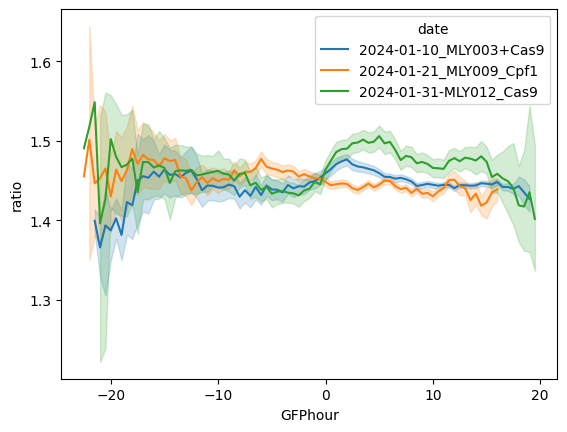

In [6]:
# sns.lineplot(df, x="frame", y="max")
dff = df.query("skew < 10 and channel=='mCherry' and area > 500")
ax = sns.lineplot(dff, x="GFPhour", y="ratio", hue="date")

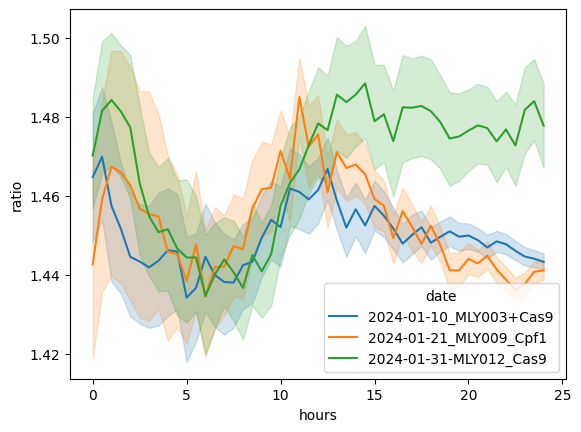

In [9]:
# sns.lineplot(df, x="frame", y="max")
# dff = df.query("skew < 10 and channel=='mCherry' and area > 500")
ax = sns.lineplot(dff, x="hours", y="ratio", hue="date")

<Axes: xlabel='GFPhour', ylabel='skew'>

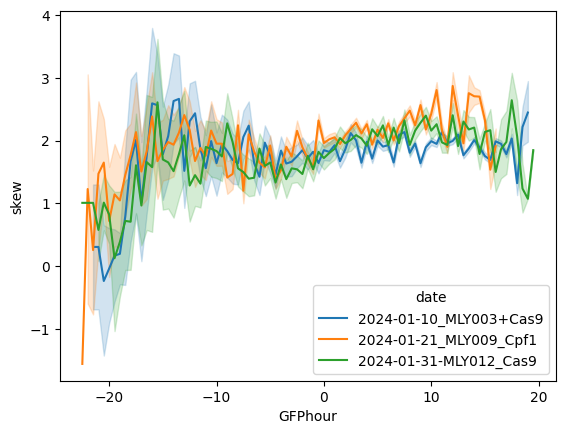

In [10]:
sns.lineplot(dff, x="GFPhour", y="skew", hue="date")

<Axes: xlabel='hours', ylabel='skew'>

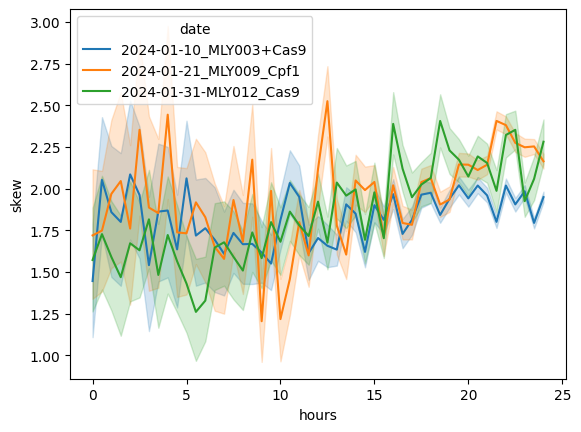

In [11]:
sns.lineplot(dff, x="hours", y="skew", hue="date")

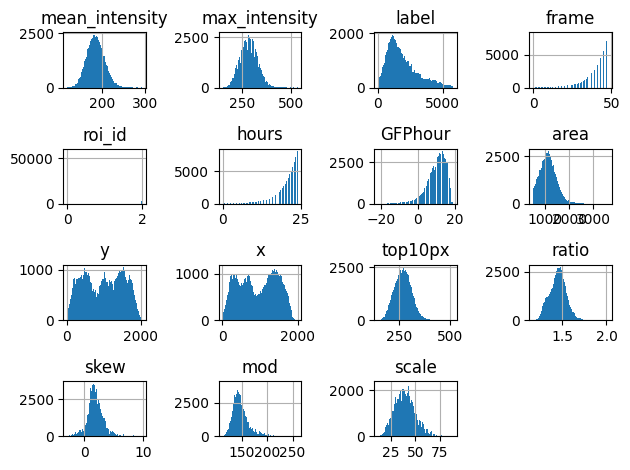

In [8]:
dff.hist(bins=100)
plt.tight_layout()

<Axes: xlabel='mod', ylabel='skew'>

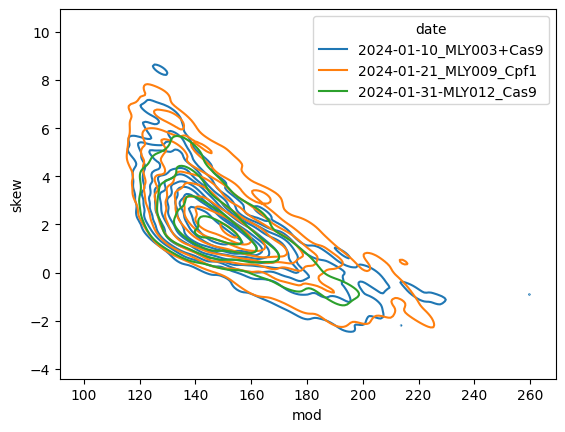

In [12]:
sns.kdeplot(dff, x="mod", y="skew", hue="date")

<Axes: xlabel='ratio', ylabel='skew'>

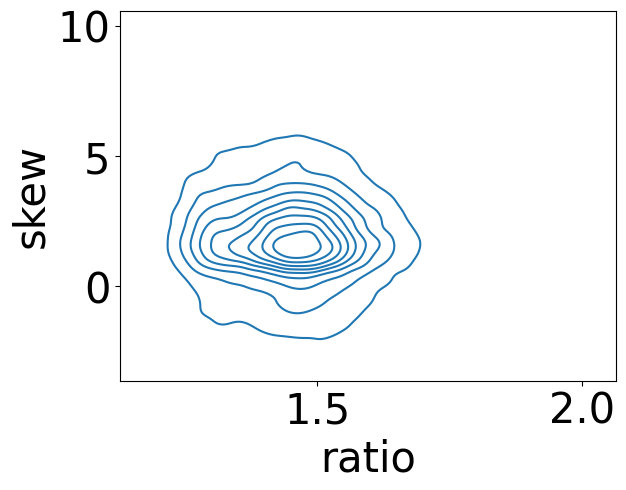

In [44]:
sns.kdeplot(dff, x="ratio", y="skew")

<Axes: xlabel='ratio', ylabel='mean_intensity'>

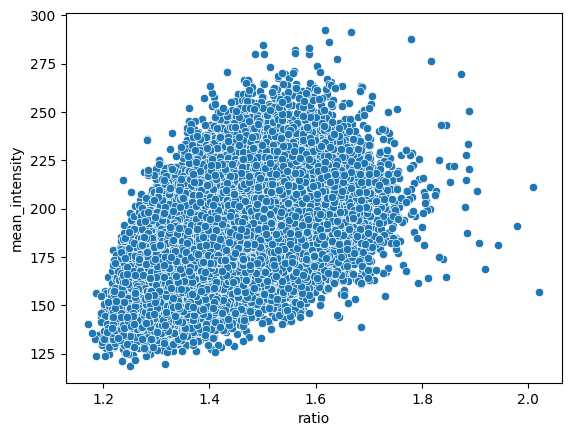

In [10]:
sns.scatterplot(dff, x="ratio", y="mean_intensity")

<Axes: >

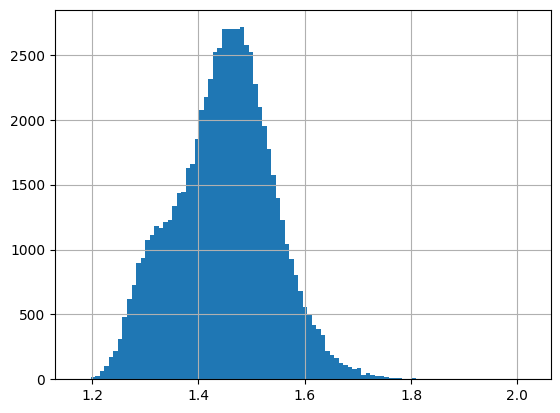

In [11]:
dff["ratio"].hist(bins=100)

<Axes: >

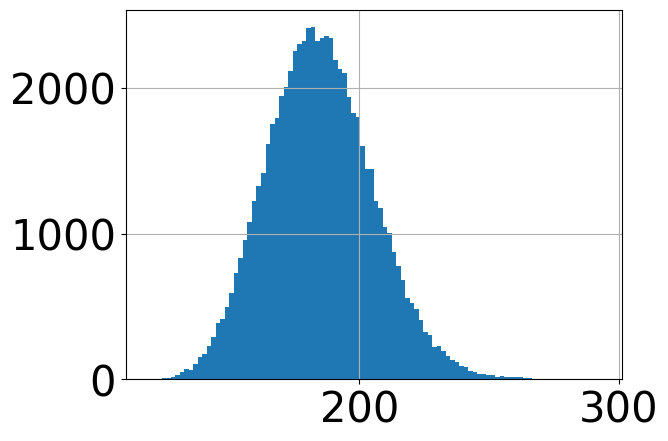

In [40]:
dff["mean_intensity"].hist(bins=100)

<Axes: >

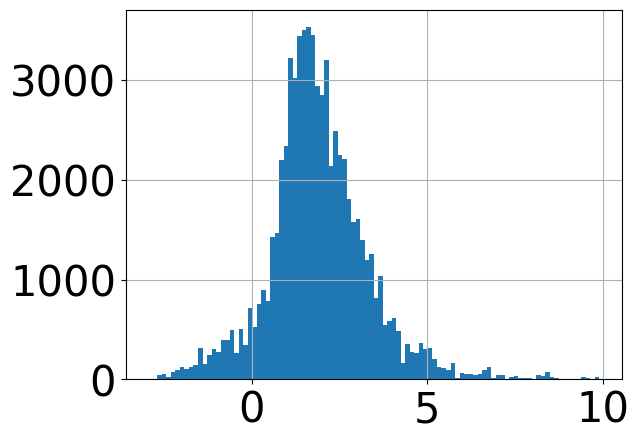

In [39]:
dff["skew"].hist(bins=100)

<Axes: >

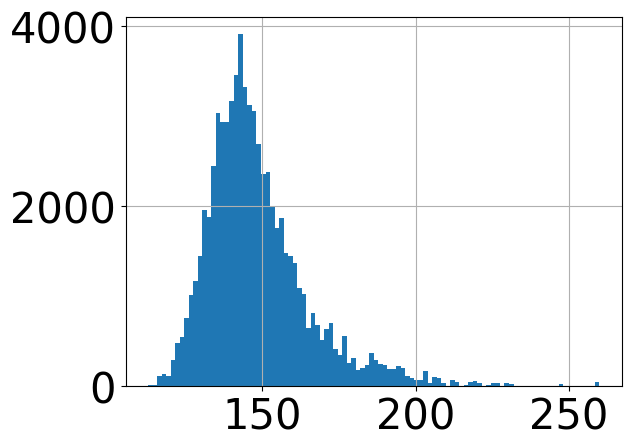

In [42]:
dff["mod"].hist(bins=100)

<Axes: xlabel='hours', ylabel='skew'>

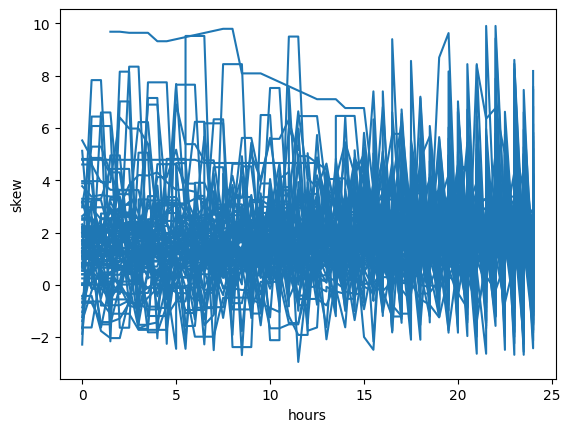

In [13]:
sns.lineplot(dff, x="hours", y="skew", units="path", estimator=None)

<Axes: xlabel='hours', ylabel='ratio'>

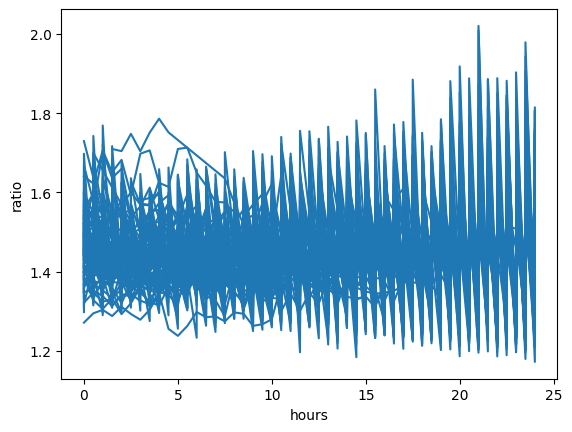

In [14]:
sns.lineplot(dff, x="hours", y="ratio", units="path", estimator=None)

<Axes: >

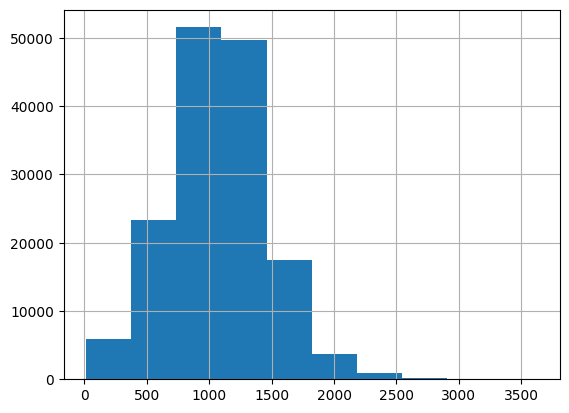

In [15]:
df.area.hist()

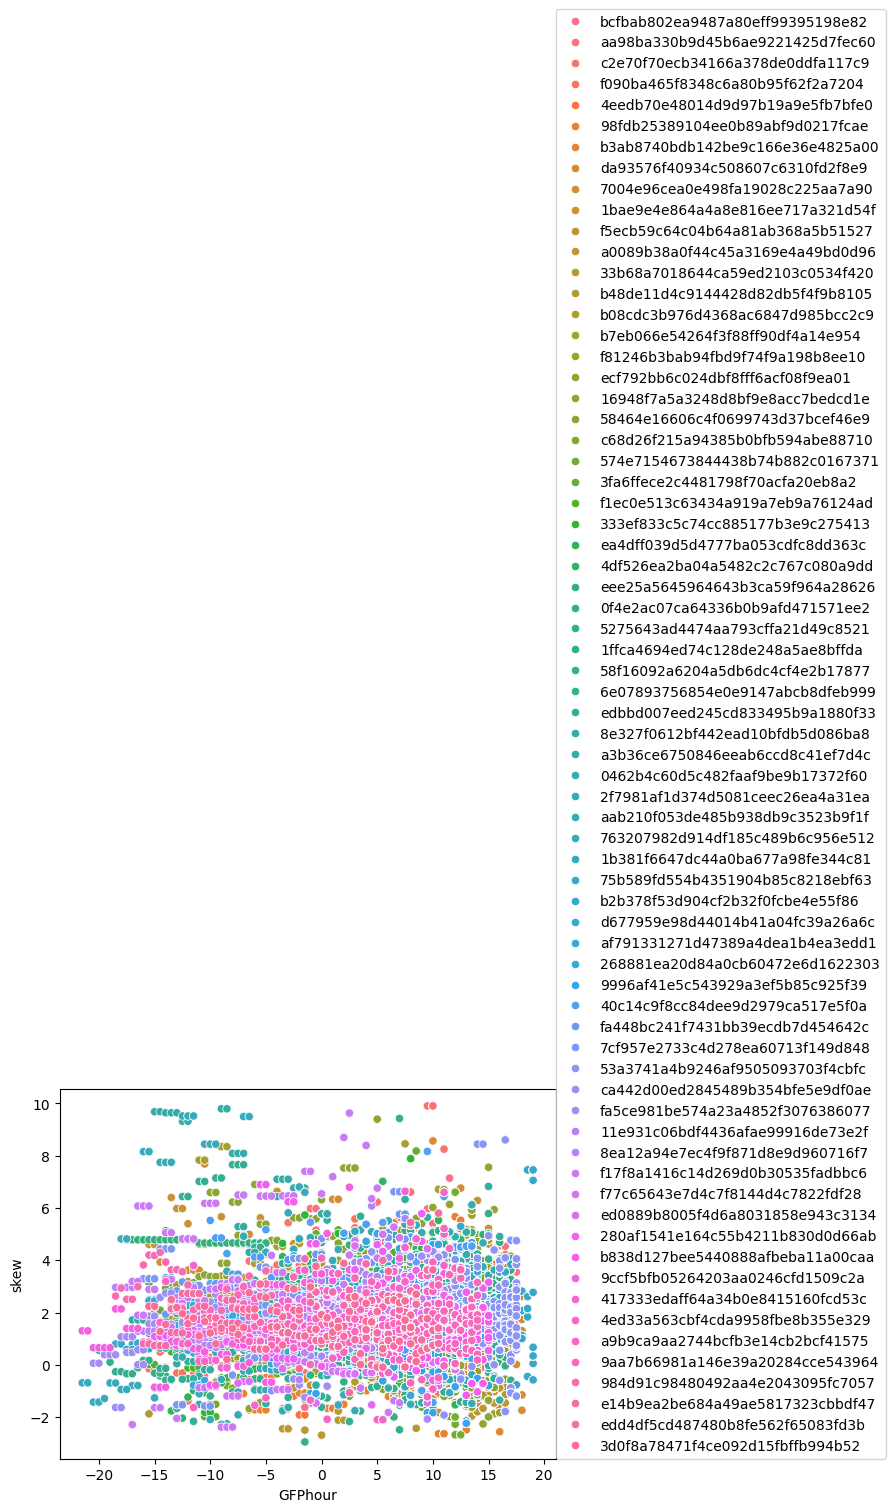

In [16]:
sns.scatterplot(dff, x="GFPhour", y="skew", hue="well_id")
plt.legend(loc=(1,0))

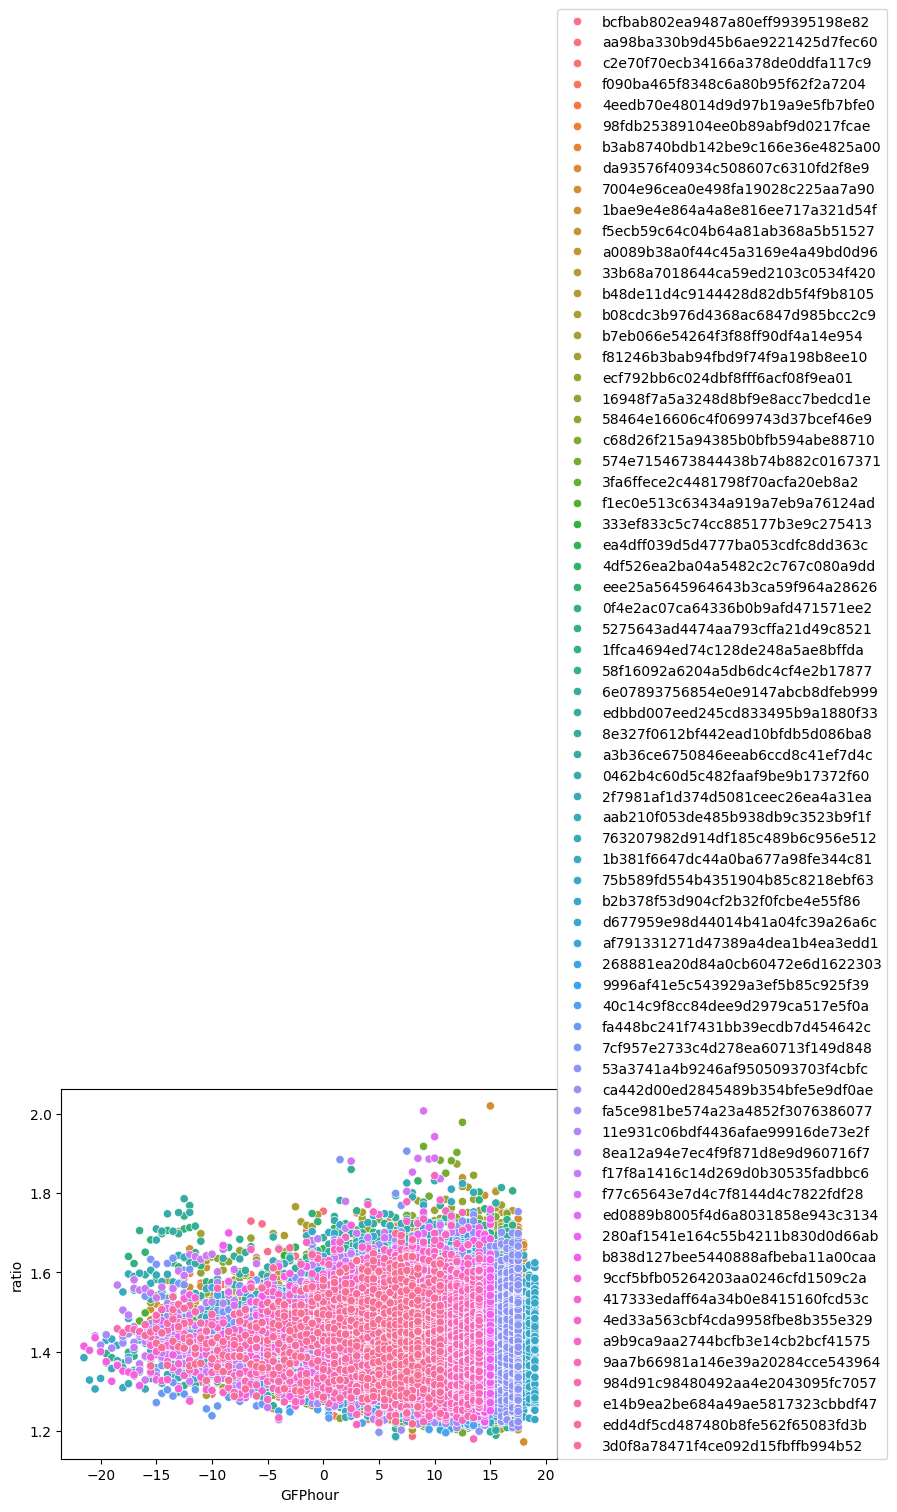

In [18]:
sns.scatterplot(dff, x="GFPhour", y="ratio", hue="well_id")
plt.legend(loc=(1,0))

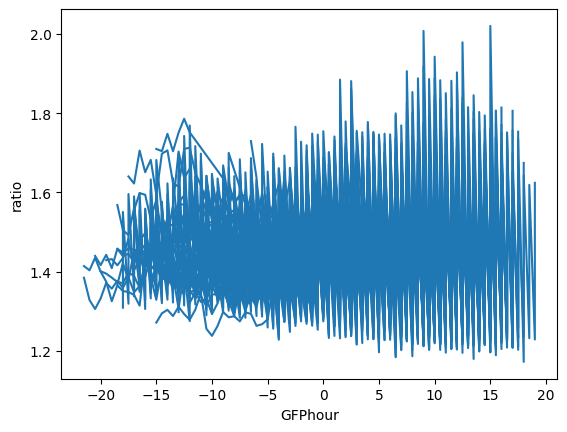

In [19]:
# sns.lineplot(df, x="frame", y="max")
ax = sns.lineplot(dff, x="GFPhour", y="ratio", units="path", estimator=None)
# sns.lineplot(df.query("skew < 100"), x="GFPhour", y="skew", ax=ax, label="skew")

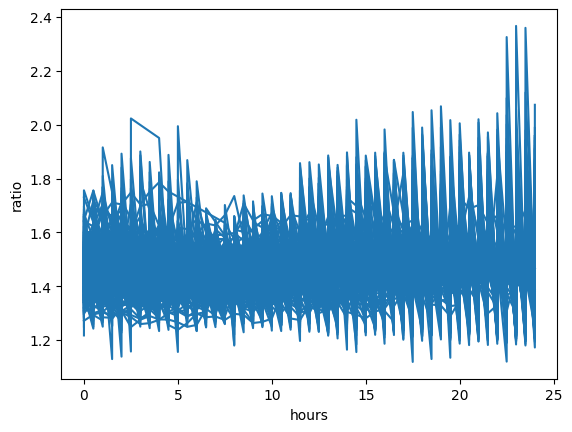

In [13]:
# sns.lineplot(df, x="frame", y="max")
ax = sns.lineplot(dff, x="hours", y="ratio", units="path", estimator=None)
# sns.lineplot(df.query("skew < 100"), x="GFPhour", y="skew", ax=ax, label="skew")

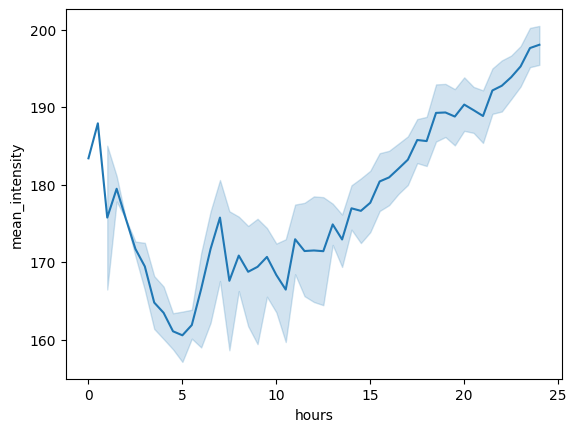

In [28]:
# sns.lineplot(df, x="frame", y="max")
ax = sns.lineplot(dff.query("well_id == 'bcfbab802ea9487a80eff99395198e82'"), x="hours", y="mean_intensity", units="path", estimator=None)
# sns.lineplot(df.query("skew < 100"), x="GFPhour", y="skew", ax=ax, label="skew")

In [27]:
dff.query("well_id == 'bcfbab802ea9487a80eff99395198e82'")

,mean_intensity,max_intensity,label,channel,frame,well_id,roi_id,path,mask,hours,...,GFPhour,area,y,x,top10px,ratio,skew,mod,scale,date
0,183.387931,339,12,mCherry,0,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,0.0,...,-6.5,1972,1326.184077,1759.901623,317.2,1.729667,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
2,187.906627,321,25,mCherry,1,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,0.5,...,-6.0,1992,1326.503514,1756.185743,307.7,1.637515,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
4,166.458944,230,35,mCherry,2,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,1.0,...,-5.5,682,1284.785924,1760.717009,219.9,1.321046,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
6,185.016798,338,36,mCherry,2,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,1.0,...,-5.5,2024,1322.211462,1753.351779,318.7,1.722546,3.966412,141.166761,55.484484,2024-01-10_MLY003+Cas9
8,177.813584,295,47,mCherry,3,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,1.5,...,-5.0,692,1286.156069,1760.388728,261.0,1.467829,3.634908,144.566442,56.726107,2024-01-10_MLY003+Cas9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,175.959420,254,3976,mCherry,48,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,24.0,...,17.5,690,1848.704348,1537.692754,243.3,1.382705,3.094196,139.002113,49.201807,2024-01-10_MLY003+Cas9
5696,182.742057,278,3979,mCherry,48,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,24.0,...,17.5,1322,1885.903177,1539.139939,270.7,1.481323,3.094196,139.002113,49.201807,2024-01-10_MLY003+Cas9
5698,187.993304,292,3980,mCherry,48,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,24.0,...,17.5,1344,1898.836310,1657.082589,275.9,1.467605,3.094196,139.002113,49.201807,2024-01-10_MLY003+Cas9
5700,179.927555,262,3981,mCherry,48,bcfbab802ea9487a80eff99395198e82,0,2024-01-10_MLY003+Cas9/pos/Include/pos52/outpu...,cellpose,24.0,...,17.5,773,1914.988357,1690.758085,248.8,1.382779,3.094196,139.002113,49.201807,2024-01-10_MLY003+Cas9


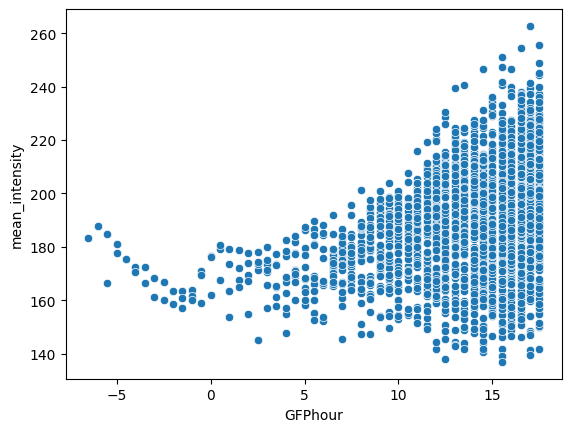

In [30]:
# sns.lineplot(df, x="frame", y="max")
ax = sns.scatterplot(dff.query("well_id == 'bcfbab802ea9487a80eff99395198e82'"), x="GFPhour", y="mean_intensity", )
# sns.lineplot(df.query("skew < 100"), x="GFPhour", y="skew", ax=ax, label="skew")

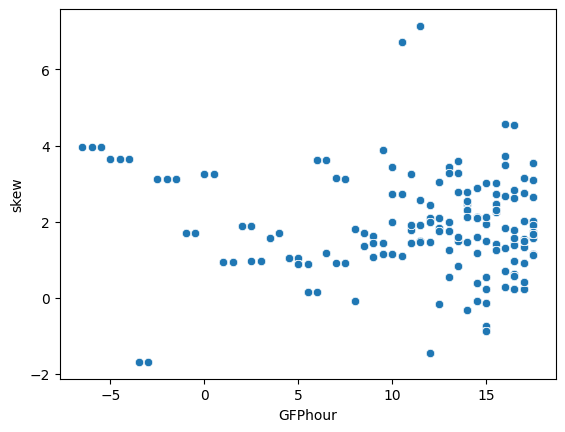

In [31]:
# sns.lineplot(df, x="frame", y="max")
ax = sns.scatterplot(dff.query("well_id == 'bcfbab802ea9487a80eff99395198e82'"), x="GFPhour", y="skew", )
# sns.lineplot(df.query("skew < 100"), x="GFPhour", y="skew", ax=ax, label="skew")

/home/aaristov/Multicell/Madison/2024-01-10_MLY003+Cas9/pos/Include/pos29/output/skew_table_0.csv


<Axes: xlabel='frame', ylabel='skew/scale_ratio'>

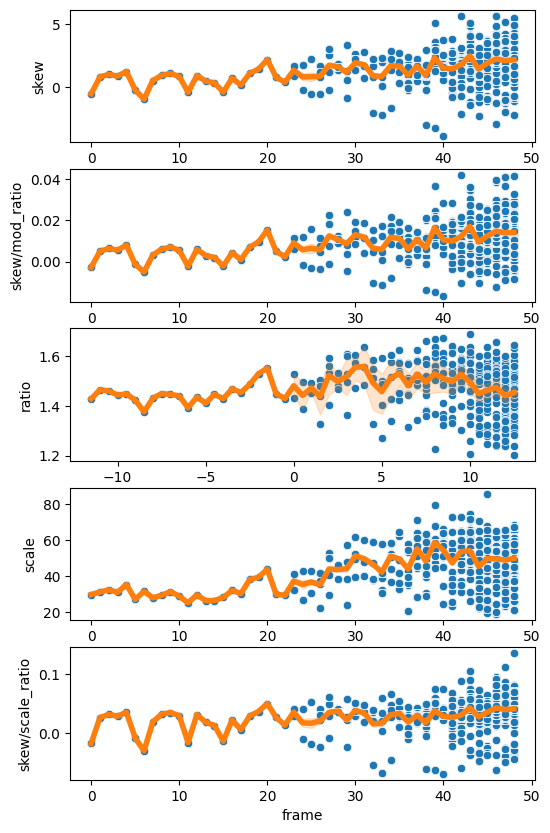

In [189]:
df52 = pd.read_csv(pp:=paths[43]).query("area > 500 and skew < 6")
df52r = merge_tables.read_csv(pp.replace("skew_","")).query("channel=='mCherry'")
print(pp)
df52.loc[:,"skew/mod_ratio"] = df52["skew"] / df52["mod"]
df52.loc[:,"skew/scale_ratio"] = df52["skew"] / df52["scale"]
fig, ax = plt.subplots(nrows=5, figsize=(6,10))
sns.scatterplot(df52, x="frame", y="skew", ax=ax[0])
sns.lineplot(df52, x="frame", y="skew", ax=ax[0], color="tab:orange", lw=4)
sns.scatterplot(df52, x="frame", y="skew/mod_ratio", ax=ax[1])
sns.lineplot(df52, x="frame", y="skew/mod_ratio", ax=ax[1], color="tab:orange", lw=4)
sns.scatterplot(df52r, x="GFPhour", y="ratio", ax=ax[2])
sns.lineplot(df52r, x="GFPhour", y="ratio", ax=ax[2], color="tab:orange", lw=4)
sns.scatterplot(df52, x="frame", y="scale", ax=ax[3])
sns.lineplot(df52, x="frame", y="scale", ax=ax[3], color="tab:orange", lw=4)
sns.scatterplot(df52, x="frame", y="skew/scale_ratio", ax=ax[4])
sns.lineplot(df52, x="frame", y="skew/scale_ratio", ax=ax[4], color="tab:orange", lw=4)

<Axes: xlabel='frame', ylabel='mod'>

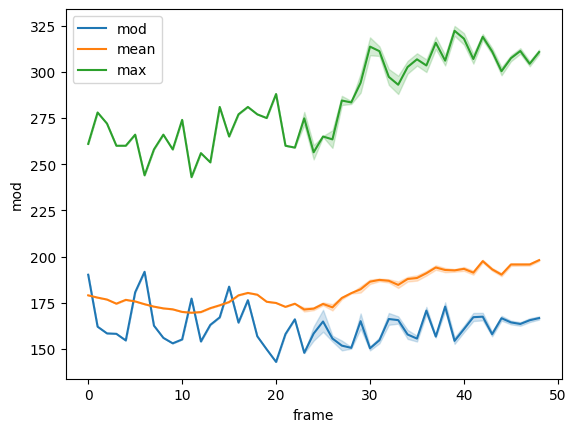

In [190]:

ax = sns.lineplot(df52, x="frame", y="mod", label="mod")
sns.lineplot(df52, x="frame", y="mean", ax=ax, label="mean")
sns.lineplot(df52, x="frame", y="max", ax=ax, label="max")

In [24]:
def calc_hist(values,edges):
    
    # constructes density over all points that are in the range
    hist,_ = np.histogram(values, bins=edges,density='True') # right edge not included, exept the last bin (test shows no exception)
    return hist

def calc_outliers(values,minimal,maximal):
    # we spot outliers and plot them individaully later    
    
    out =None
    foo=list(values[values<minimal])
    if(foo):
        out=foo.copy()

    foo=list(values[values>maximal])
    if(foo):
        
        if(out is None):
            out=foo
        else:    
            out= out + foo    
        
    return out


def det_outliers(data,prop,time_scale,minimal,maximal):

    outlier_data=pd.DataFrame(data.groupby(by=[time_scale])[prop].apply(lambda x: calc_outliers(x,minimal,maximal)))
    outlier_data=outlier_data.reset_index(level=[time_scale])
    outlier_data=outlier_data.explode(prop,ignore_index=True)
    
    return  outlier_data


def det_hist(data,prop,time_scale,edges,bin_width):

    hist_data=pd.DataFrame(data.groupby(by=[time_scale])[prop].apply(lambda x: calc_hist(x,edges)))
    hist_data=hist_data.reset_index(level=[time_scale])
    hist_data=hist_data.explode(prop,ignore_index=True)

    hist_data=hist_data.astype({prop: float})
    hist_data['bin']=0.0
    
    for f in hist_data[time_scale].unique():
        hist_data.loc[hist_data[time_scale]==f,'bin']=  bin_width/2 + edges[:-1]

    return hist_data  

In [32]:
def heatmap(
    data,
    minimal=1,
    bin_width=0.02,
    maximal=2.5,
    pdf_min=0,
    pdf_max=3,
    time_scale= 'GFPhour', 
    prop='ratio'):

    edges = np.arange(minimal, maximal, bin_width)
    print(edges)
    print(data[prop].min(),data[prop].max())   
    
    outlier_data= det_outliers(data,prop,time_scale,minimal,maximal)
    hist_data= det_hist(data,prop,time_scale,edges,bin_width)
    


    ## hist of all the data
    
    
       
    
    X,Y=np.meshgrid(hist_data[time_scale].unique(),hist_data.bin.unique())
    
    hist_data_pl=hist_data.pivot(index="bin", columns=time_scale, values=prop)
    
        
    plt.figure(figsize=(6,4),dpi=200)
    ax=plt.gca()
    cm=plt.pcolormesh(X, Y,hist_data_pl.to_numpy(),vmin=pdf_min,vmax=pdf_max,cmap='BuPu')
    
    
    sns.scatterplot(data=outlier_data,x=time_scale,y=prop,color='k',ax=ax)
    
    # sns.lineplot(data=data,x=time_scale,y=prop,ax=ax,linewidth=3, color='lavender')
    plt.colorbar(cm)
    
    plt.rcParams.update({'font.size': 30})
    
    
    plt.ylabel(prop) 
    plt.xlabel(time_scale)
    

[1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26
 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54
 1.56 1.58 1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82
 1.84 1.86 1.88 1.9  1.92 1.94 1.96 1.98 2.   2.02 2.04 2.06 2.08 2.1
 2.12 2.14 2.16 2.18 2.2  2.22 2.24 2.26 2.28 2.3  2.32 2.34 2.36 2.38
 2.4  2.42 2.44 2.46 2.48]
-2.951988597983317 9.906107018895842


/home/aaristov/miniconda3/envs/adc/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


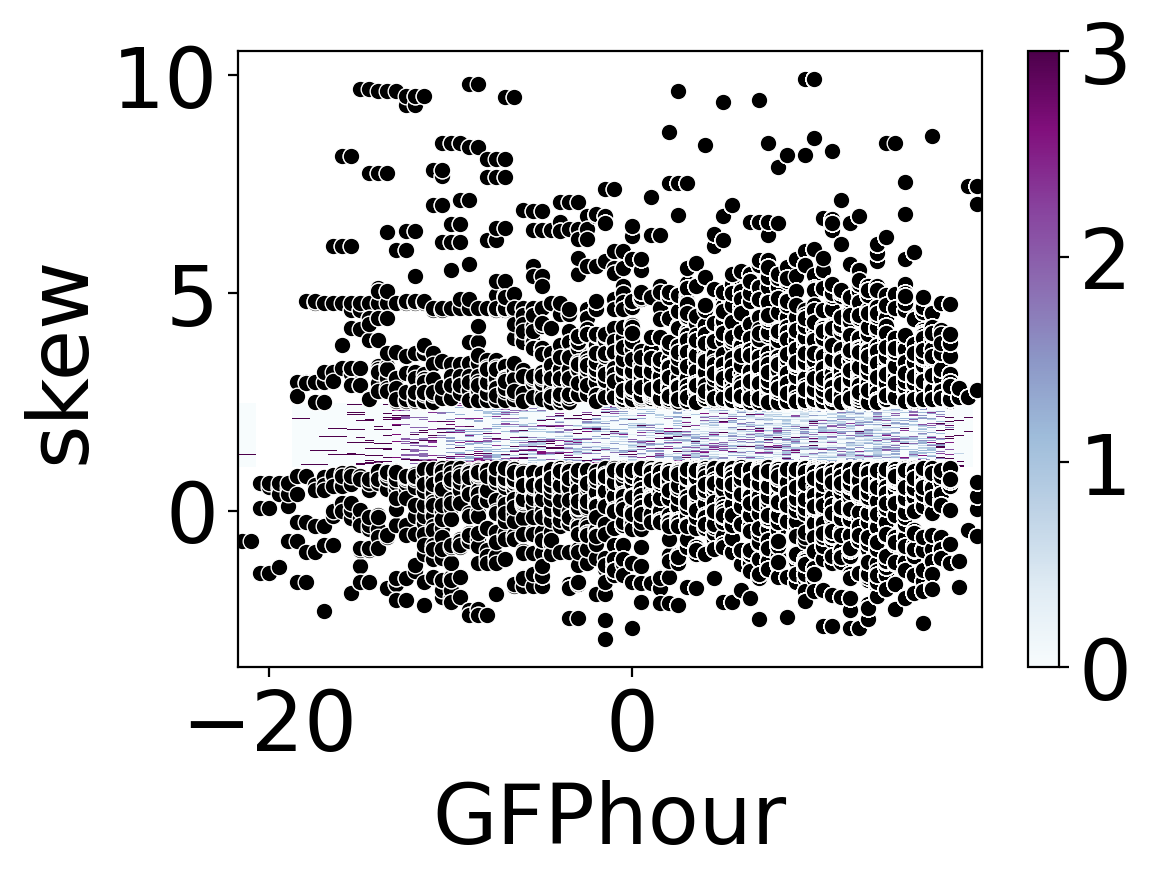

In [33]:
heatmap(dff, prop="skew")

[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12]
-2.951988597983317 9.906107018895842


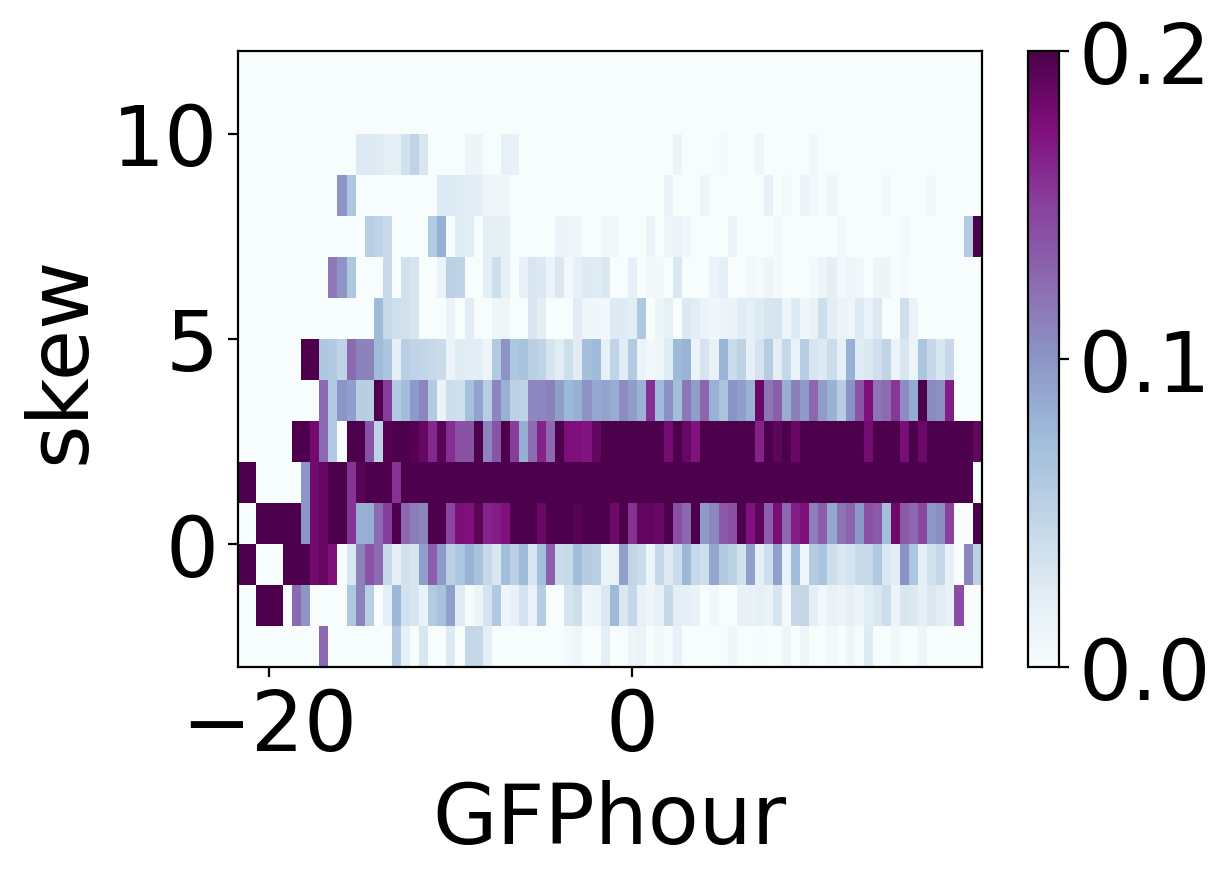

In [36]:
heatmap(dff, prop="skew", minimal=-3, maximal=13, bin_width=1, pdf_max=0.2)

In [150]:
minimal=-1
maximal=13
bin_width=1


edges = np.arange(minimal, maximal, bin_width)
hist_data= det_hist(dff,"skew",'GFPhour',edges,bin_width)

In [151]:
outlier_data= det_outliers(dff,"skew",'GFPhour',minimal,maximal)


In [152]:
outlier_data

,GFPhour,skew
0,-21.5,None
1,-21.0,None
2,-20.5,-1.427643
3,-20.0,-1.427643
4,-19.5,-1.29342
...,...,...
1368,17.0,None
1369,17.5,None
1370,18.0,None
1371,18.5,None


In [153]:
hist_data

,GFPhour,skew,bin
0,-21.5,0.500000,-0.5
1,-21.5,0.000000,0.5
2,-21.5,0.500000,1.5
3,-21.5,0.000000,2.5
4,-21.5,0.000000,3.5
...,...,...,...
1061,19.0,0.242424,7.5
1062,19.0,0.000000,8.5
1063,19.0,0.000000,9.5
1064,19.0,0.000000,10.5


In [154]:
pdf_min=0
pdf_max=.5
prop="skew"   

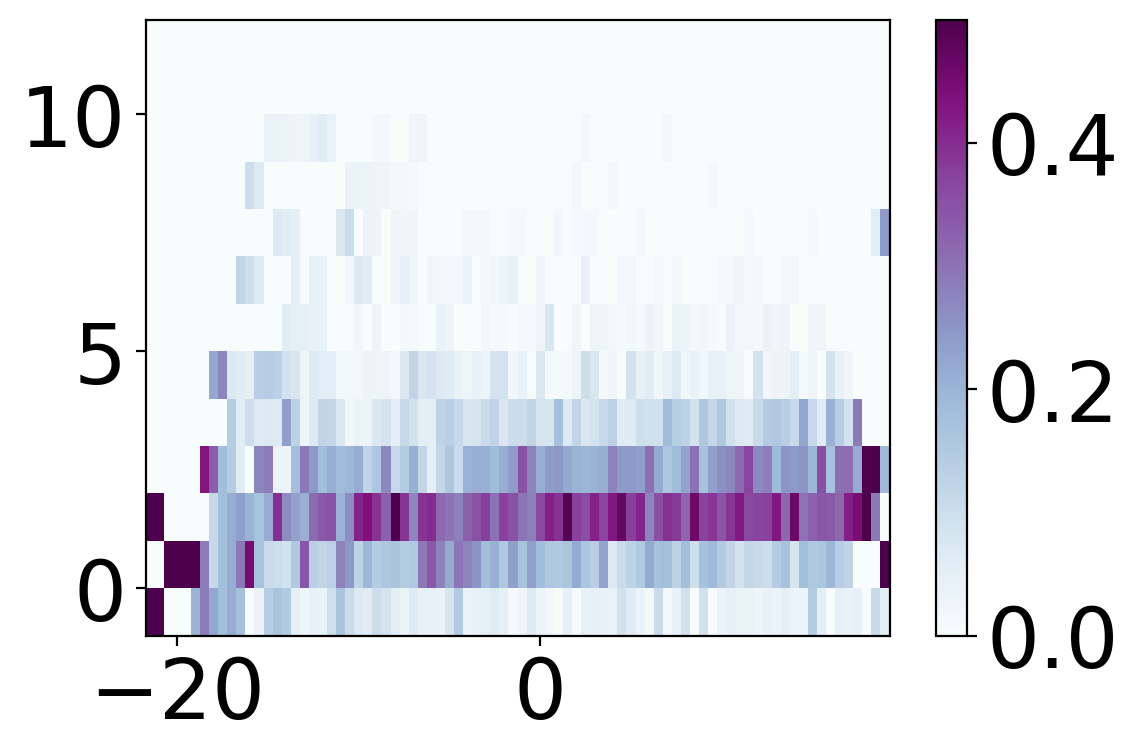

In [155]:
X,Y=np.meshgrid(hist_data[time_scale].unique(),hist_data.bin.unique())

hist_data_pl=hist_data.pivot(index="bin", columns=time_scale, values=prop)

    
plt.figure(figsize=(6,4),dpi=200)
ax=plt.gca()
cm=plt.pcolormesh(X, Y,hist_data_pl.to_numpy(),vmin=pdf_min,vmax=pdf_max,cmap='BuPu')


# sns.lineplot(data=data,x=time_scale,y=prop,ax=ax,linewidth=3, color='lavender')
plt.colorbar(cm)

plt.rcParams.update({'font.size': 30})



# plt.xlim([-20,20])
# plt.ylim([1.3,1.7])